<a href="https://colab.research.google.com/github/OllyK/Cata2Data/blob/colab/Copy_of_Create_LoTTS_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Create a LoTTS Dataset Using Cata2Data

To start, create a local clone of this repository

Install cata2data into your local environment (We recommend that you should use a venv on your local machine).



In [1]:
!git clone https://github.com/mb010/Cata2Data.git && pip install ./Cata2Data && cp Cata2Data/examples/lotssdr2/data.py .

Cloning into 'Cata2Data'...
remote: Enumerating objects: 554, done.
remote: Counting objects: 100% (187/187), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 554 (delta 112), reused 135 (delta 94), pack-reused 367 (from 1)
Receiving objects: 100% (554/554), 6.16 MiB | 8.47 MiB/s, done.
Resolving deltas: 100% (230/230), done.
Processing ./Cata2Data
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 703.8/703.8 kB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.6/218.6 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.0/398.0 kB 28.6 MB/s eta 0:00:00
  Created wheel for cata2data: filename=cata2data-0.1.dev111-py3-none-any.whl size=13203 sha25

## Download the data

Use the `data_scrapper.py` script to download the image files. If you want to just download one pointing (instead of all 841 pointings; 434 GB), then call it using the --test flag:

In [2]:
%%python Cata2Data/examples/lotssdr2/data_scrapper.py --dir downloaded_data/ --test

  0%|          | 0/841 [04:16<?, ?it/s]


This will have downloaded a .fits image file

In [7]:
!ls downloaded_data/public/DR2/mosaics/P000+23/

mosaic-blanked.fits


Next, you need to download the catalog directly from the website at this link (3.9 GB). This dataloader is currently built to work with the [Radio-optical cross match](https://lofar-surveys.org/dr2_release.html#:~:text=Radio%2Doptical%20crossmatch%20catalogue) catalog described in [Hardcastle et al. 2023](https://arxiv.org/abs/2309.00102).

In [4]:
!wget -P downloaded_data/ https://lofar-surveys.org/public/DR2/catalogues/combined-release-v1.1-LM_opt_mass.fits

--2024-09-30 15:21:02--  https://lofar-surveys.org/public/DR2/catalogues/combined-release-v1.1-LM_opt_mass.fits
Resolving lofar-surveys.org (lofar-surveys.org)... 147.197.135.238
Connecting to lofar-surveys.org (lofar-surveys.org)|147.197.135.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3934039680 (3.7G) [image/fits]
Saving to: ‘downloaded_data/combined-release-v1.1-LM_opt_mass.fits’

combined-release-v1 100%[===================>]   3.66G  7.90MB/s    in 9m 44s  

2024-09-30 15:30:47 (6.43 MB/s) - ‘downloaded_data/combined-release-v1.1-LM_opt_mass.fits’ saved [3934039680/3934039680]



## Split the Catalogue

This will take the full catalog and split it into one catalog per image and save those into the folder where each of those images is stored. This is what Cata2Data currently expects - lists of images and catalogs with equal length to use to construct a dataloader.

In [9]:
%%python /content/Cata2Data/examples/lotssdr2/catalog_splitter.py --catalog_path downloaded_data/combined-release-v1.1-LM_opt_mass.fits --image_paths downloaded_data/public/DR2/mosaics/P000+23/

['downloaded_data/public/DR2/mosaics/P000+23/mosaic-blanked.fits']
SIMPLE FILTER: field_name: P000+23; samples: 3522; original_sample_count: 4167359; sample_estimate: 4955
STRONG FILTER: samples: 3522


## Construct the dataset

Running the example cell below will construct a dataset from the data that has been downloaded. The LoTTSDataset class is imported from the [data.py file](https://github.com/mb010/Cata2Data/blob/main/examples/lotssdr2/data.py) before being populated with data from the `downloaded_data` directory. We then plot images for the first ten members of the dataset and print the first ten rows of the corresponding dataframe.

Found 1 images and 1 catalogues in downloaded_data. Using 2 fields.


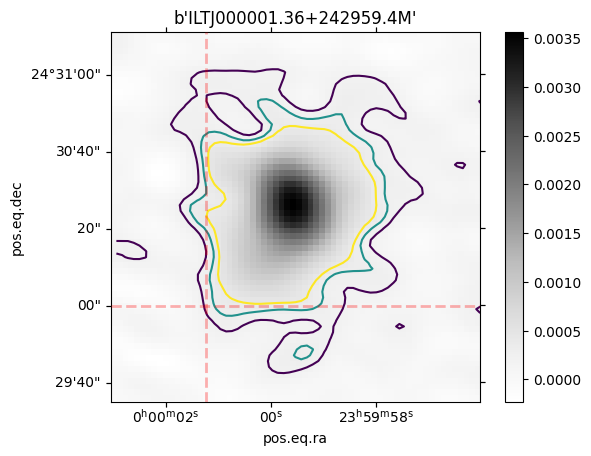

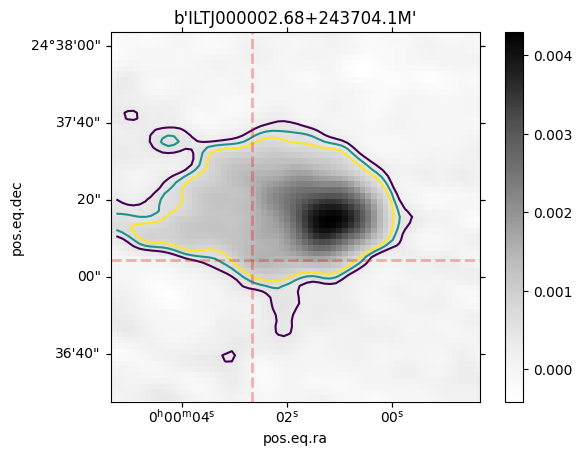

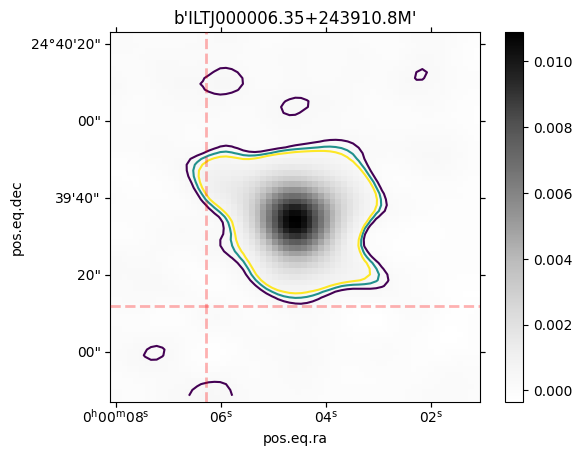

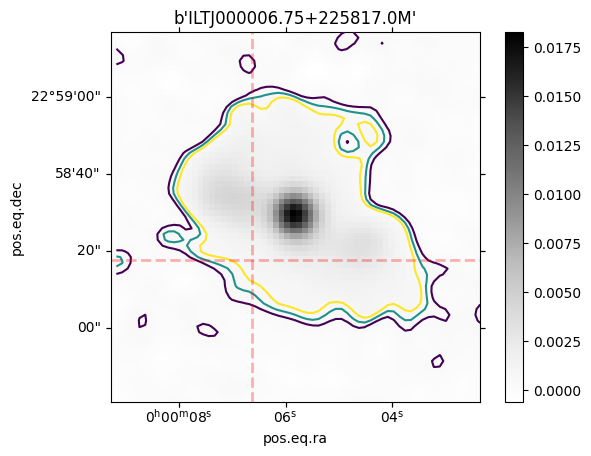

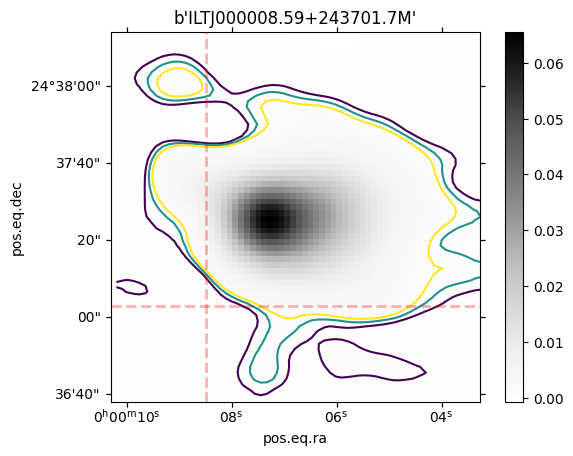

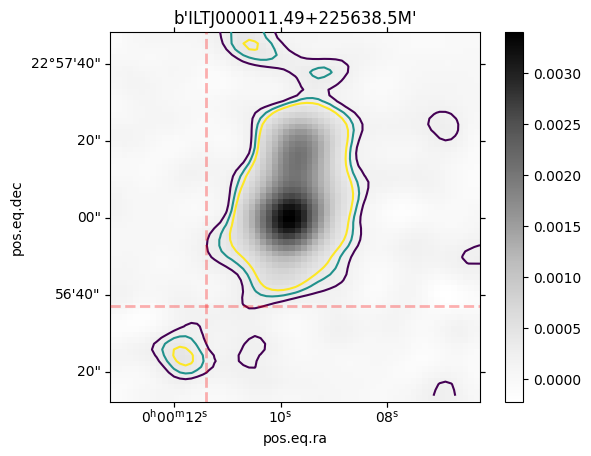

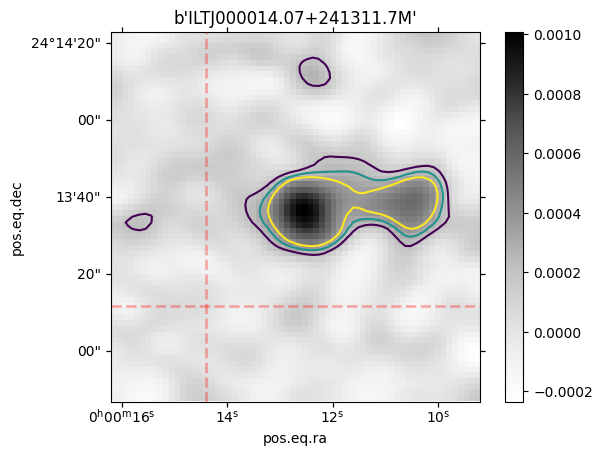

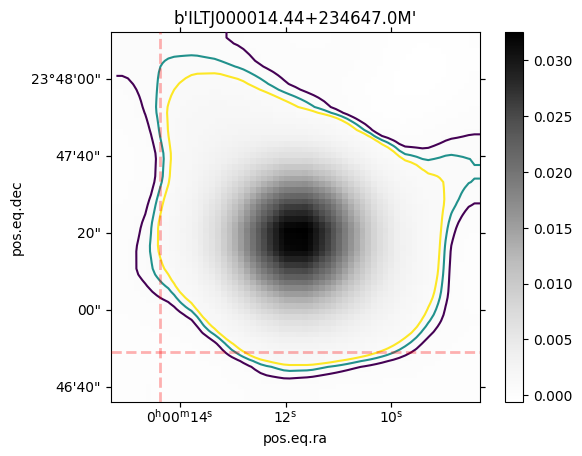

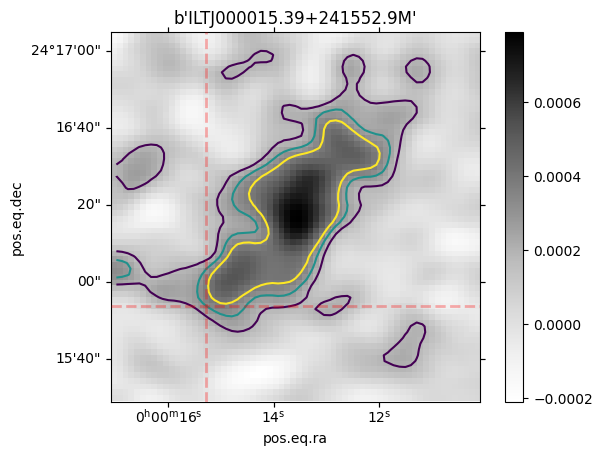

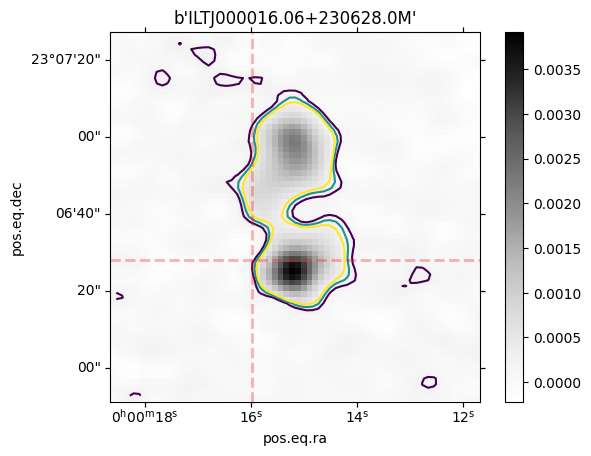

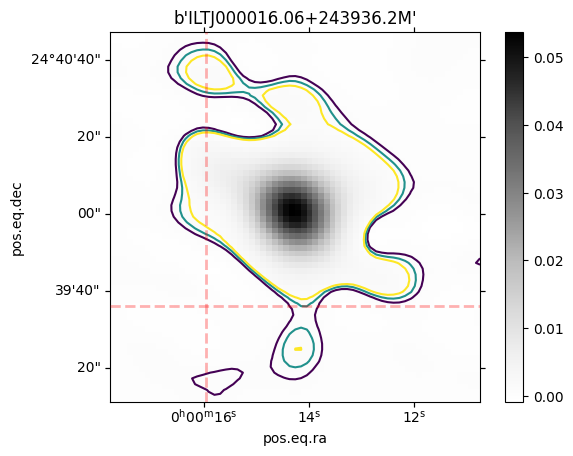

,field,Source_Name,ra,dec,Isl_rms,log10_Total_flux,Total_flux,cutout_height,cutout_width,S_Code
6,downloaded_data,b'ILTJ000001.36+242959.4',0.005422,24.499846,0.000096,1.146101,13.999133,32,32,b'M'
9,downloaded_data,b'ILTJ000002.68+243704.1',0.011170,24.617818,0.000176,1.690306,49.012386,48,48,b'M'
37,downloaded_data,b'ILTJ000006.35+243910.8',0.026457,24.653010,0.000126,1.379070,23.937029,32,32,b'M'
40,downloaded_data,b'ILTJ000006.75+225817.0',0.027924,22.971455,0.000161,1.950535,89.234879,48,48,b'M'
49,downloaded_data,b'ILTJ000008.59+243701.7',0.035772,24.617144,0.000273,2.351249,224.516632,32,32,b'M'
70,downloaded_data,b'ILTJ000011.49+225638.5',0.047730,22.943503,0.000103,0.982159,9.597514,32,32,b'M'
87,downloaded_data,b'ILTJ000014.07+241311.7',0.060039,24.219658,0.000093,0.548566,3.536434,32,32,b'M'
89,downloaded_data,b'ILTJ000014.44+234647.0',0.059995,23.779952,0.000212,1.702480,50.405720,16,16,b'M'
95,downloaded_data,b'ILTJ000015.39+241552.9',0.064127,24.264720,0.000092,0.782591,6.061654,32,32,b'M'
101,downloaded_data,b'ILTJ000016.06+230628.0',0.066898,23.107779,0.000091,1.081177,12.055263,48,48,b'M'


In [19]:
from data import LoTTSDataset
from torchvision.transforms import v2
import torch

transforms = v2.Compose(
    [
        v2.ToImage(),
        v2.ToDtype(torch.float32),
        v2.Resize(size=(64, 64)),
    ]
)

data = LoTTSDataset(
    data_folder="downloaded_data",  # Change this to where you saved your data
    cutout_scaling=1.5,
    transform=transforms,
)

for i in range(len(data)):
    if i > 10:
        break
    data.plot(
        i,
        contours=True,
        sigma_name="Isl_rms",
        min_sigma=2,
        title=data.df.iloc[i]["Source_Name"] + data.df.iloc[i]["S_Code"],
    )

data.df.head(10)